In [14]:
import torch
import torchvision
import numpy as np
import random
import os

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from torchvision.datasets import ImageFolder
from torchvision import transforms

from imutils import paths
from PIL import Image
import shutil
import glob

#from torch.utils.data import DataLoader, Dataset
#from torchvision import datasets, transforms
#import torch.nn as nn
#%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from numpy import asarray

In [3]:
# read in images as tuples and numpyarrays
non = []
mild = []
very_mild = []
moderate = []

all_images = []
labels = []

for filename in glob.glob('./datasets/Non_Demented/*.jpg'): #assuming jpg files
    im=Image.open(filename)
    data = asarray(im)
    non.append((data, "non_demented"))
    
    all_images.append(data)
    labels.append("non_demented")
    im.close()
    
for filename in glob.glob('./datasets/Mild_Demented/*.jpg'): #assuming jpg files
    im=Image.open(filename)
    data = asarray(im)
    mild.append((data, "mild_demented"))
    
    all_images.append(data)
    labels.append("mild_demented")
    im.close()

for filename in glob.glob('./datasets/Very_Mild_Demented/*.jpg'): #assuming jpg files
    im=Image.open(filename)
    data = asarray(im)
    very_mild.append((data, "very_mild_demented"))
    
    all_images.append(data)
    labels.append("very_mild_demented")
    im.close()

for filename in glob.glob('./datasets/Moderate_Demented/*.jpg'): #assuming jpg files
    im=Image.open(filename)
    data = asarray(im)
    moderate.append([data, "moderate_demented"])
    
    all_images.append(data)
    labels.append("moderate_demented")
    im.close()

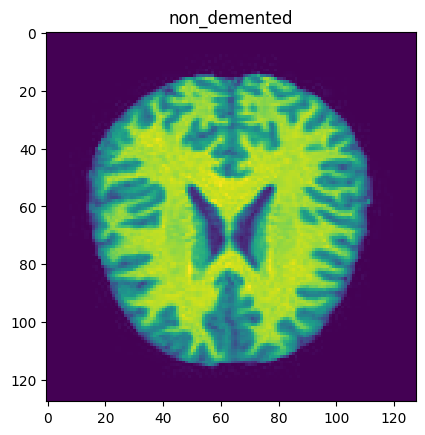

In [4]:
# testing to make sure we can display our images
plt.imshow(all_images[100], interpolation='nearest')
plt.title(labels[100])
plt.show()

In [5]:
# train_test_split with sklearn
X_train, X_test, y_train, y_test = train_test_split(all_images, labels, test_size=0.33, random_state=42)

In [6]:
X_train.type()

AttributeError: 'list' object has no attribute 'type'

In [8]:
clf = make_pipeline(SVC(gamma='auto'))


X_train = np.array(X_train)
X_train_2d = X_train.reshape((X_train.shape[0], -1))
clf.fit(X_train_2d, y_train)

#clf.fit(X_train, y_train)

#StandardScaler(), 
#predictions = clf.predict(X_test)
#print(X_train)
#print(y_train)

Pipeline(steps=[('svc', SVC(gamma='auto'))])

In [11]:
X_test = np.array(X_test)
X_test_2d = X_test.reshape((X_test.shape[0], -1))
predictions = clf.predict(X_test_2d)

In [15]:
print(accuracy_score(y_test, predictions))

0.5104166666666666
